# Models and Classifiers

In [8]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import  train_test_split
from collections import Counter

In [3]:
%matplotlib inline
rcParams['figure.figsize']=7,4
sb.set_style('whitegrid')

In [10]:
cars=pd.read_csv('mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
#select only those variables which satisfy the assumption of the model

cars_data=cars.iloc[:,[5,11]]
y=cars.iloc[:,9]

#checking for indepenence b/w features

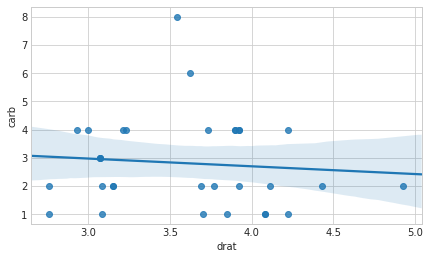

In [15]:
#are predictor variables ordinal? ie a variable that can be grouped into a limited number of subcategories
sb.regplot(x='drat',y='carb',data=cars,scatter=True)

In [17]:
drat=cars['drat']
carb=cars['carb']
spearmanr_coeff,p_value=spearmanr(drat,carb)
print "Spearman Randk Correlation Coeff %0.3f" %(spearmanr_coeff)

Spearman Randk Correlation Coeff -0.125


In [18]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [19]:
#checking the missing values
cars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

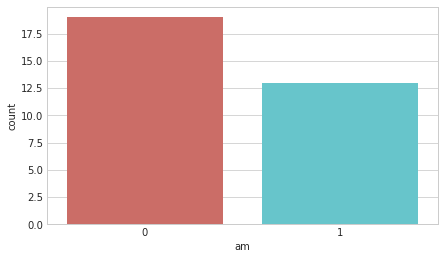

In [20]:
#checking id target variable is ordinal
sb.countplot(x='am',data=cars,palette='hls')

In [21]:
#datset sufficiency (50 obs for each predictor) ie 100 reqd in this case
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [22]:
x_scale=scale(cars_data)
print type(x_scale)

<type 'numpy.ndarray'>


In [25]:
print x_scale[:5]
print cars_data.head()

[[ 0.57659448  0.74696708]
 [ 0.57659448  0.74696708]
 [ 0.48158406 -1.14010764]
 [-0.98157639 -1.14010764]
 [-0.84856181 -0.51108274]]
   drat  carb
0  3.90     4
1  3.90     4
2  3.85     1
3  3.08     1
4  3.15     2


In [27]:
LogReg=LogisticRegression()
LogReg.fit(x_scale,y)
print LogReg.score(x_scale,y)

0.8125


In [29]:
y_pred=LogReg.predict(x_scale)
print metrics.classification_report(y,y_pred)

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32

